In [ ]:
!pip install --q

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smbitayak","key":"f41de6ea2874b9e6cc6ab5961666e8a0"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
 ! cp kaggle.json ~/.kaggle/

In [5]:
!chmod600~/kaggle/kaggle.json

/bin/bash: chmod600~/kaggle/kaggle.json: No such file or directory


In [8]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
filepath = ('/content/weatherHistory.csv.zip')
data = pd.read_csv(filepath)
data.head()

Formatted Date  ...                      Daily Summary
0  2006-04-01 00:00:00.000 +0200  ...  Partly cloudy throughout the day.
1  2006-04-01 01:00:00.000 +0200  ...  Partly cloudy throughout the day.
2  2006-04-01 02:00:00.000 +0200  ...  Partly cloudy throughout the day.
3  2006-04-01 03:00:00.000 +0200  ...  Partly cloudy throughout the day.
4  2006-04-01 04:00:00.000 +0200  ...  Partly cloudy throughout the day.

[5 rows x 12 columns]

In [14]:
data.shape

(96453, 12)

In [15]:
data.info

<bound method DataFrame.info of                       Formatted Date  ...                           Daily Summary
0      2006-04-01 00:00:00.000 +0200  ...       Partly cloudy throughout the day.
1      2006-04-01 01:00:00.000 +0200  ...       Partly cloudy throughout the day.
2      2006-04-01 02:00:00.000 +0200  ...       Partly cloudy throughout the day.
3      2006-04-01 03:00:00.000 +0200  ...       Partly cloudy throughout the day.
4      2006-04-01 04:00:00.000 +0200  ...       Partly cloudy throughout the day.
...                              ...  ...                                     ...
96448  2016-09-09 19:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96449  2016-09-09 20:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96450  2016-09-09 21:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96451  2016-09-09 22:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96452  2016-09-09 23:00:00.000 +0200  ...  Partly cloudy starting 

In [16]:
data['Loud Cover'].unique()

array([0.])

In [17]:
data.drop(['Loud Cover'], axis = 1, inplace = True)
data.head()

Formatted Date  ...                      Daily Summary
0  2006-04-01 00:00:00.000 +0200  ...  Partly cloudy throughout the day.
1  2006-04-01 01:00:00.000 +0200  ...  Partly cloudy throughout the day.
2  2006-04-01 02:00:00.000 +0200  ...  Partly cloudy throughout the day.
3  2006-04-01 03:00:00.000 +0200  ...  Partly cloudy throughout the day.
4  2006-04-01 04:00:00.000 +0200  ...  Partly cloudy throughout the day.

[5 rows x 11 columns]

In [18]:
data.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [20]:
import numpy as np

In [21]:
 miss_percent = (data.isna().sum().sum()/np.product(data.shape))*100
miss_percent

0.04872839621369994

In [22]:
data['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [23]:
data['Precip Type'].fillna(axis = 0, method = 'bfill', inplace= True)
data.head()

Formatted Date  ...                      Daily Summary
0  2006-04-01 00:00:00.000 +0200  ...  Partly cloudy throughout the day.
1  2006-04-01 01:00:00.000 +0200  ...  Partly cloudy throughout the day.
2  2006-04-01 02:00:00.000 +0200  ...  Partly cloudy throughout the day.
3  2006-04-01 03:00:00.000 +0200  ...  Partly cloudy throughout the day.
4  2006-04-01 04:00:00.000 +0200  ...  Partly cloudy throughout the day.

[5 rows x 11 columns]

In [24]:
data.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [25]:
data['Formatted Date'].head()

0    2006-04-01 00:00:00.000 +0200
1    2006-04-01 01:00:00.000 +0200
2    2006-04-01 02:00:00.000 +0200
3    2006-04-01 03:00:00.000 +0200
4    2006-04-01 04:00:00.000 +0200
Name: Formatted Date, dtype: object

In [26]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc= True)
data['Formatted Date'].head()

0   2006-03-31 22:00:00+00:00
1   2006-03-31 23:00:00+00:00
2   2006-04-01 00:00:00+00:00
3   2006-04-01 01:00:00+00:00
4   2006-04-01 02:00:00+00:00
Name: Formatted Date, dtype: datetime64[ns, UTC]

In [27]:
data.set_index(['Formatted Date'], inplace = True)
data.head()

Summary  ...                      Daily Summary
Formatted Date                            ...                                   
2006-03-31 22:00:00+00:00  Partly Cloudy  ...  Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00  Partly Cloudy  ...  Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00  Mostly Cloudy  ...  Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00  Partly Cloudy  ...  Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00  Mostly Cloudy  ...  Partly cloudy throughout the day.

[5 rows x 10 columns]

In [28]:
data.nunique()

Summary                       27
Precip Type                    2
Temperature (C)             7574
Apparent Temperature (C)    8984
Humidity                      90
Wind Speed (km/h)           2484
Wind Bearing (degrees)       360
Visibility (km)              949
Pressure (millibars)        4979
Daily Summary                214
dtype: int64

In [29]:
sns.set_style(style = 'whitegrid')

In [30]:
data.describe()

Temperature (C)  ...  Pressure (millibars)
count     96453.000000  ...          96453.000000
mean         11.932678  ...           1003.235956
std           9.551546  ...            116.969906
min         -21.822222  ...              0.000000
25%           4.688889  ...           1011.900000
50%          12.000000  ...           1016.450000
75%          18.838889  ...           1021.090000
max          39.905556  ...           1046.380000

[8 rows x 7 columns]

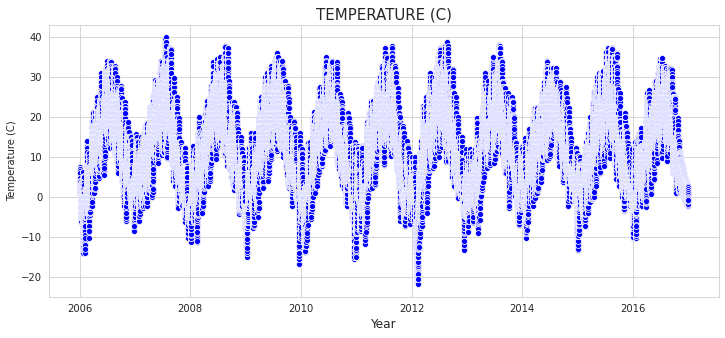

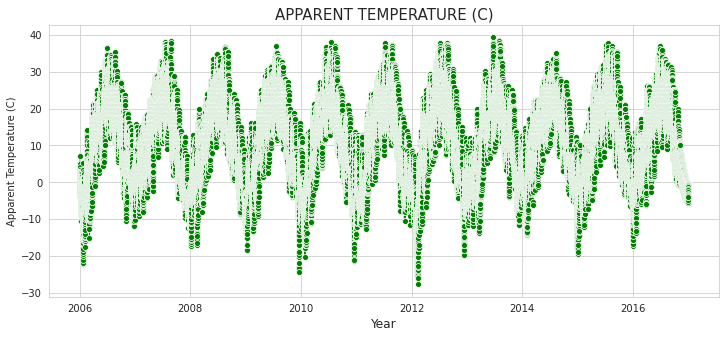

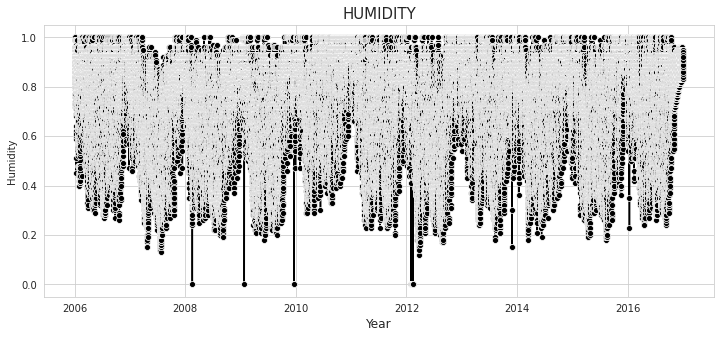

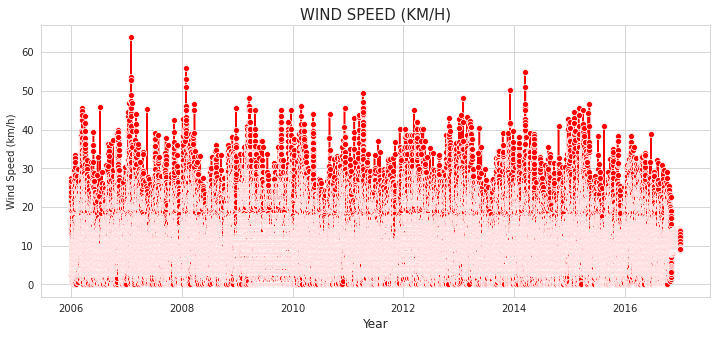

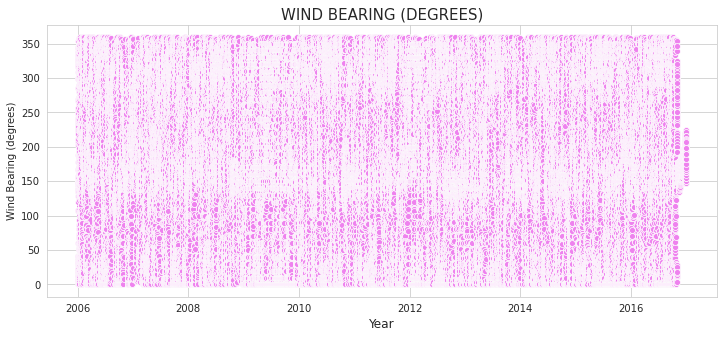

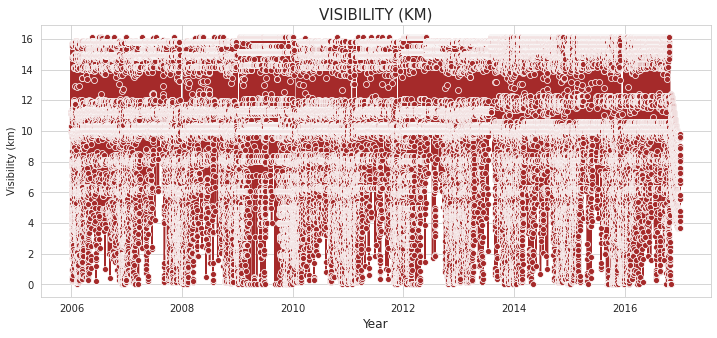

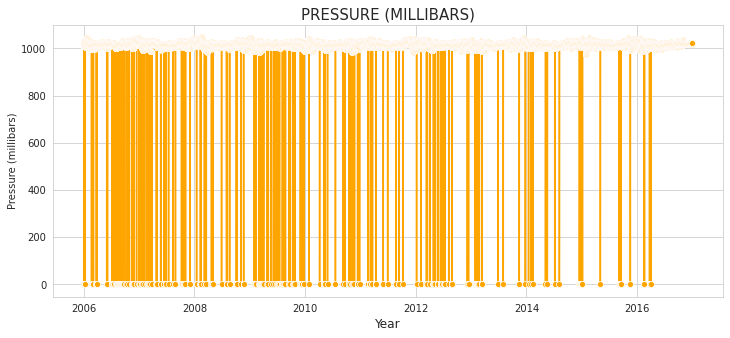

In [31]:
color={2:'blue',
       3:'green',
       4:'black',
       5:'red',
       6:'violet',
       7:'brown',
       8:'orange'}
for index in range(2,9):
    plt.figure(figsize=(12,5))
    plt.xlabel('Year', fontsize=12)
    plt.title('{}'.format(data.columns[index].upper()), fontsize=15)
    sns.lineplot(data=data.iloc[:,index], 
                 color=color[index], marker='o')
    plt.show()

In [32]:
data.corr()

Temperature (C)  ...  Pressure (millibars)
Temperature (C)                  1.000000  ...             -0.005447
Apparent Temperature (C)         0.992629  ...             -0.000219
Humidity                        -0.632255  ...              0.005454
Wind Speed (km/h)                0.008957  ...             -0.049263
Wind Bearing (degrees)           0.029988  ...             -0.011651
Visibility (km)                  0.392847  ...              0.059818
Pressure (millibars)            -0.005447  ...              1.000000

[7 rows x 7 columns]

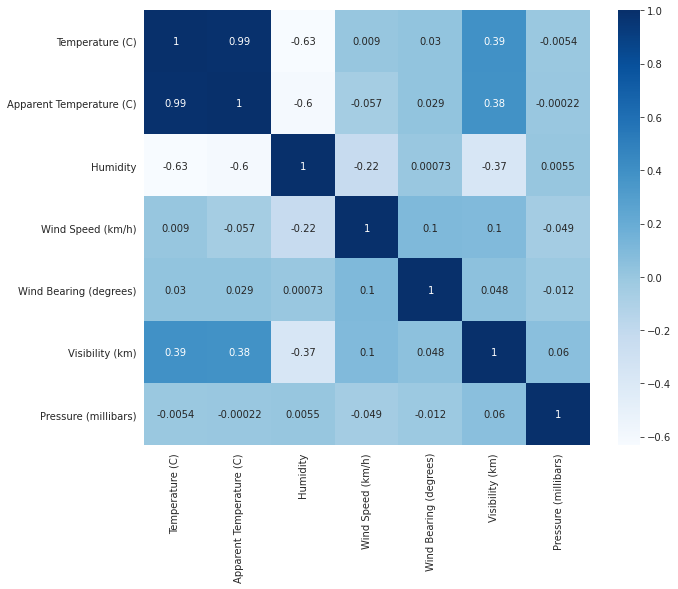

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(data = data.corr(), annot = True, cmap = 'Blues')
plt.show()

In [34]:
indices = ['Temperature (C)', 'Humidity', 'Precip Type', 'Summary']
ex_data = data.loc[:,indices]
ex_data

Temperature (C)  Humidity Precip Type        Summary
Formatted Date                                                                 
2006-03-31 22:00:00+00:00         9.472222      0.89        rain  Partly Cloudy
2006-03-31 23:00:00+00:00         9.355556      0.86        rain  Partly Cloudy
2006-04-01 00:00:00+00:00         9.377778      0.89        rain  Mostly Cloudy
2006-04-01 01:00:00+00:00         8.288889      0.83        rain  Partly Cloudy
2006-04-01 02:00:00+00:00         8.755556      0.83        rain  Mostly Cloudy
...                                    ...       ...         ...            ...
2016-09-09 17:00:00+00:00        26.016667      0.43        rain  Partly Cloudy
2016-09-09 18:00:00+00:00        24.583333      0.48        rain  Partly Cloudy
2016-09-09 19:00:00+00:00        22.038889      0.56        rain  Partly Cloudy
2016-09-09 20:00:00+00:00        21.522222      0.60        rain  Partly Cloudy
2016-09-09 21:00:00+00:00        20.438889      0.61        rain  Partly Cloudy

[96453 rows x 4 columns]

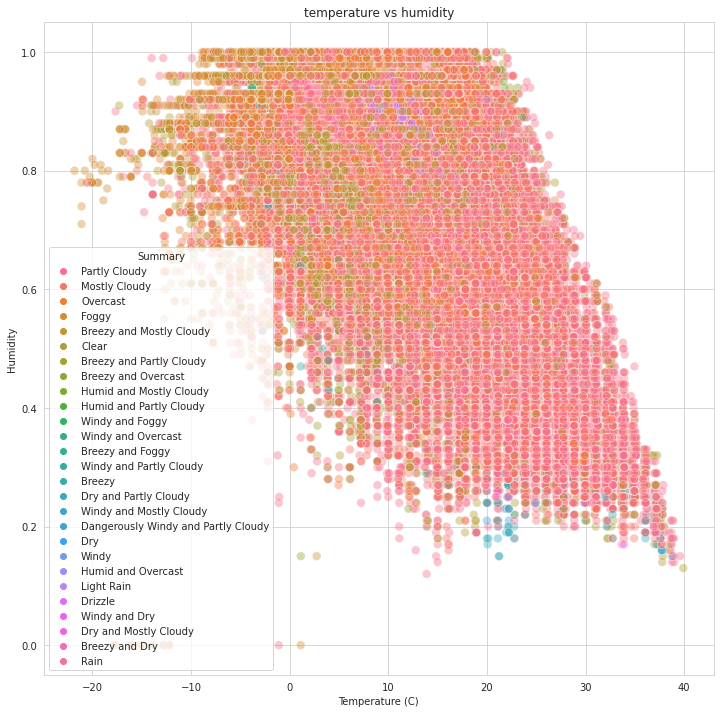

In [35]:
#scatter plot for temperature and humidity by summary
plt.figure(figsize = (12,12))
plt.title('temperature vs humidity')
sns.scatterplot(x=ex_data.iloc[:,0], y=ex_data.iloc[:,1], hue= ex_data.iloc[:,3], s=75, alpha = 0.4)
plt.show()

       Temperature (C)      Humidity
count     96453.000000  96453.000000
mean         11.932678      0.734899
std           9.551546      0.195473
min         -21.822222      0.000000
25%           4.688889      0.600000
50%          12.000000      0.780000
75%          18.838889      0.890000
max          39.905556      1.000000


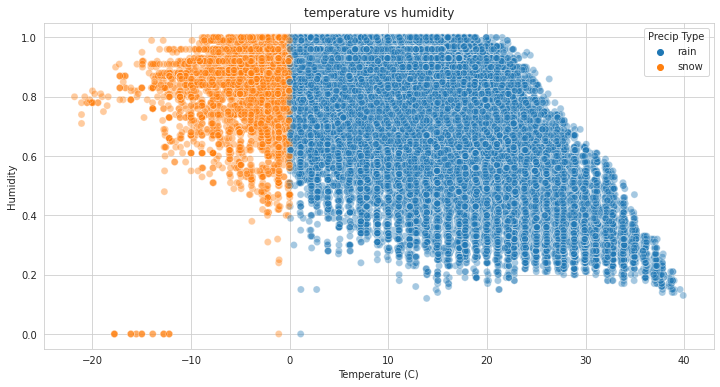

In [36]:
#scatter plot for temperature and humidity by percip type
 
plt.figure(figsize = (12,6))
print(ex_data.describe())
plt.title('temperature vs humidity')
sns.scatterplot(x=ex_data.iloc[:,0], y=ex_data.iloc[:,1], hue= ex_data.iloc[:,2], s=50, alpha = 0.4)
plt.show()

In [37]:
#Function for plotting year-wise data
def year_plot(year):
    temp = ex_data[ex_data.index.year==year]
    plt.figure(figsize=(8,4))
    plt.title('Temperature vs Humidity for {}'.format(year))
    sns.scatterplot(x=temp.iloc[:,0], 
                    y=temp.iloc[:,1],
                    hue=temp.iloc[:,2],
                    s=50,
                    alpha = 0.3)
    plt.show()
    print(temp.describe())
    print('-'*70)

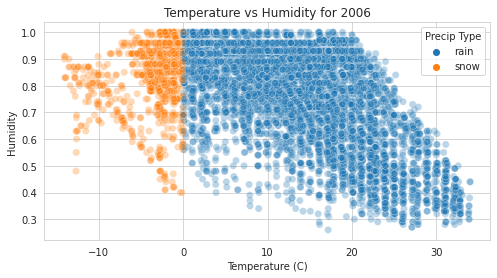

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         11.215225     0.767349
std           9.597856     0.174838
min         -14.088889     0.260000
25%           2.805556     0.650000
50%          11.711111     0.810000
75%          18.209722     0.920000
max          34.005556     1.000000
----------------------------------------------------------------------


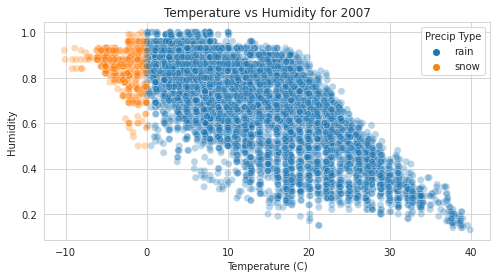

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         12.134677     0.689647
std           9.384959     0.199642
min         -10.155556     0.130000
25%           5.033333     0.550000
50%          11.138889     0.740000
75%          18.800000     0.850000
max          39.905556     1.000000
----------------------------------------------------------------------


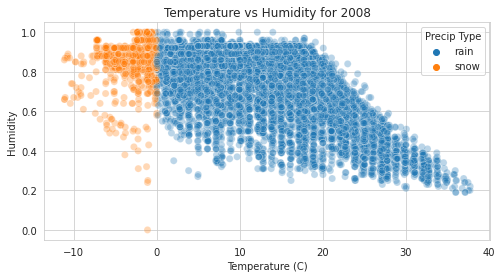

       Temperature (C)     Humidity
count      8784.000000  8784.000000
mean         12.161819     0.701239
std           9.177221     0.184552
min         -11.127778     0.000000
25%           5.583333     0.570000
50%          11.577778     0.740000
75%          18.656944     0.850000
max          37.755556     1.000000
----------------------------------------------------------------------


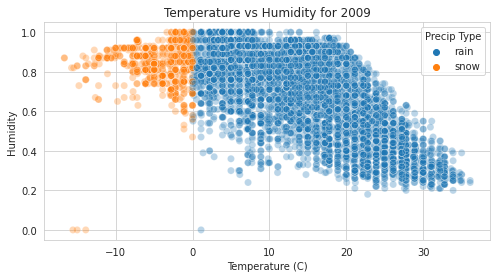

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         12.269682     0.707247
std           9.769443     0.204392
min         -16.666667     0.000000
25%           5.000000     0.560000
50%          12.508333     0.760000
75%          19.894444     0.880000
max          36.111111     1.000000
----------------------------------------------------------------------


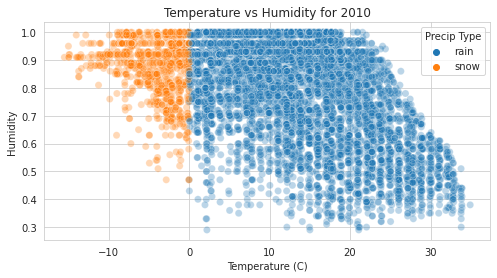

       Temperature (C)     Humidity
count      8784.000000  8784.000000
mean         11.200176     0.796861
std           9.651203     0.168371
min         -15.483333     0.290000
25%           3.750000     0.690000
50%          11.975000     0.850000
75%          17.800000     0.930000
max          34.927778     1.000000
----------------------------------------------------------------------


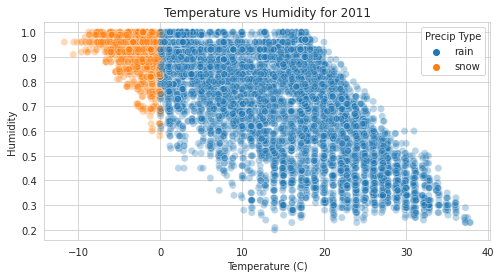

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         11.524934     0.736008
std          10.138539     0.202678
min         -11.700000     0.200000
25%           2.665278     0.590000
50%          11.688889     0.790000
75%          18.945833     0.910000
max          37.800000     1.000000
----------------------------------------------------------------------


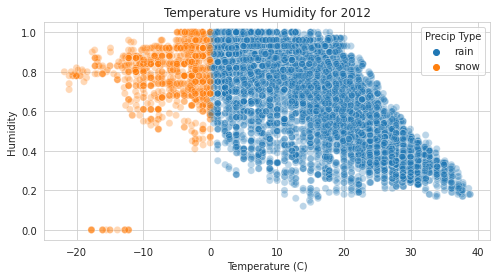

       Temperature (C)     Humidity
count      8784.000000  8784.000000
mean         11.986824     0.689513
std          11.021216     0.218004
min         -21.822222     0.000000
25%           3.793056     0.527500
50%          12.222222     0.730000
75%          20.000000     0.870000
max          38.861111     1.000000
----------------------------------------------------------------------


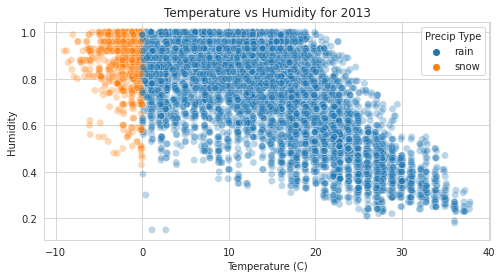

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         11.941017     0.754197
std           9.389492     0.194925
min          -8.983333     0.150000
25%           3.943056     0.630000
50%          11.941667     0.800000
75%          18.750000     0.920000
max          37.872222     1.000000
----------------------------------------------------------------------


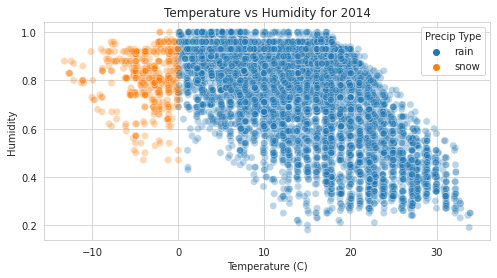

       Temperature (C)     Humidity
count      8757.000000  8757.000000
mean         12.528228     0.748571
std           8.184753     0.183548
min         -13.255556     0.180000
25%           6.600000     0.640000
50%          12.355556     0.800000
75%          18.344444     0.900000
max          33.911111     1.000000
----------------------------------------------------------------------


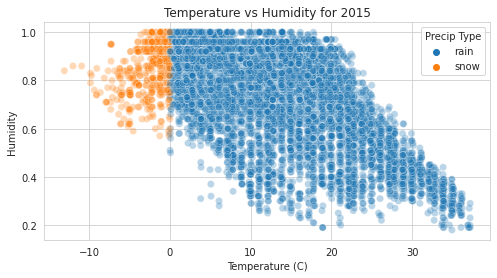

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         12.312088     0.732354
std           9.366111     0.200232
min         -13.066667     0.180000
25%           4.433333     0.590000
50%          12.055556     0.780000
75%          18.911111     0.900000
max          37.194444     1.000000
----------------------------------------------------------------------


In [ ]:
 for year in range(2006,2016):
year_plot(year)